# 2D Histogram Tutorial

This notebook shows an example of how to use the `Hist2dQuadTree` class in `astroQTpy`.

### Simple 2D Gaussian

First, we'll create some mock data drawn from two indepedent normal distributions.

In [1]:
import numpy as np

N_samples = 10_000
x = np.random.normal(0, 1.0, N_samples)
y = np.random.normal(0, 1.0, N_samples)

Now import `Hist2dQuadTree` from the quadtree module in `astroQTpy` and create a new instance.

In [2]:
from astroqtpy.quadtree import Hist2dQuadTree

In [3]:
guassian_2d_histogram = Hist2dQuadTree(
    -5, 5, -5, 5,
    N_points=10,  # subdivide grid if node has more than this number of points...
    max_depth=6   # ...until the quadtree reaches this depth.
)

Now add the fake data to the quadtree object.

In [4]:
guassian_2d_histogram.add_data(x, y)

Plot it!

In [5]:
import matplotlib.pyplot as plt

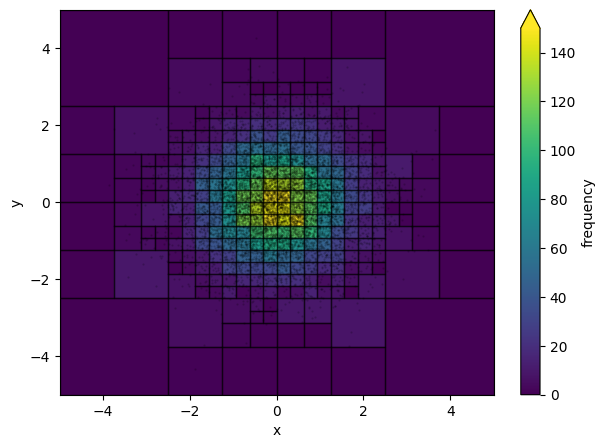

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# plot data
ax.scatter(x, y, marker='.', s=1, c='k', alpha=0.2, zorder=99)

# plot the quadtree
hist2d = guassian_2d_histogram.draw_tree(ax, cmap='viridis', vmin=0, vmax=150)
plt.colorbar(hist2d, ax=ax, label='frequency', extend='max')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

### Gaia H-R Diagram

In [29]:
from astroquery.gaia import Gaia